Code is from the URL below, aims to explore PCA and clustering https://medium.com/@jackiee.jecksom/clustering-and-principal-component-analysis-pca-from-sklearn-c8ea5fed6648

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np
import rasterio
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


## 1. Importing the data

In [2]:
df = pd.read_csv('./data/Sovidata.csv')

In [3]:
df.head(2)

,WIJKCODE,geometry,Wijk,65-year-olds and above (%),0 to 19-year-olds (%),Special Needs (%),Medical facilities (%),Average age of population (years),Average household size (person),Rental Housing (%),Distance to large supermarket (km),Average price of residential properties sold (€),Distance to fire stations (km),Residential Density (houses/Ha),Unemployed women %,Female population (%),Single parent households (%),Distance to daycare centres (km),Unemployed Workforce (persons),Average number of private cars per home (%),Average disposable income (€),Owner-occupied homes (%),No of residential properties sold (houses),Single-person households (%),Voter turnout (%),Social Cohesion score (0-10),Unsafe feeling population (%),Distance to attractions (km),Reported violent crimes (%),Dutch native population (%),Moroccan population (%),Turkish population (%),Surinamese population (%),Total migration (persons),Low educated population (%),High educated population (%),Non - Dutch speaking (persons),No of schools in 1km (schools)
0,2,"POLYGON ((79699.61600000039 459495.3720000014,...",Belgisch Park,0.209,0.220,0.171,1.9,42.4,2.02,0.364,0.5,551399.0,2.2,44.1,0.496,0.510,0.063,0.5,150.0,0.70,60700.0,0.634,146.0,0.495,0.785,6.5,0.025,1.2,0.071,0.618,0.006,0.008,0.020,-37.0,0.18,0.47,1035.0,1.9
1,3,"POLYGON ((81024.63100000098 458499.4609999992,...",Westbroekpark/Duttendel,0.416,0.196,0.204,2.0,52.4,1.67,0.272,1.4,916514.0,2.4,6.0,0.440,0.553,0.042,0.6,20.0,0.97,91000.0,0.719,56.0,0.426,0.900,6.7,0.005,1.0,0.042,0.648,0.003,0.002,0.005,92.0,0.10,0.64,290.0,1.6


In [4]:
df1 = df.drop(['WIJKCODE','geometry','Wijk'], axis=1)

### Data Normalisation 

The variables listed below are not normalised in %, 0-10, per capita values or density functions: 
- Average age of population (years)
- Average household size (person)
- Distance to large supermarket (km)
- Average price of residential properties sold (€)
- Distance to fire stations (km)
- Residential Density (houses/Ha)
- Distance to daycare centres (km)
- Unemployed Workforce (persons)
- Average disposable income (€)
- No of residential properties sold (houses)
- Distance to attractions (km)
- Total migration (persons)
- Non - Dutch speaking (persons)
- No of schools in 1km (schools)

In [6]:
normal_values = Normalizer().fit_transform(df1.values)
print(normal_values)

[[3.76759195e-07 3.96588626e-07 3.08257523e-07 ... 8.47257520e-07
  1.86576922e-03 3.42508359e-06]
 [4.51672833e-07 2.12807393e-07 2.21493409e-07 ... 6.94881282e-07
  3.14868081e-04 1.73720321e-06]
 [3.98375428e-07 3.44256502e-07 2.26998829e-07 ... 1.11244459e-06
  3.26968512e-03 2.40528560e-06]
 ...
 [1.64651272e-07 5.75287577e-07 4.48327560e-07 ... 7.14150095e-07
  4.66181312e-04 9.91875132e-07]
 [5.82424640e-07 2.19895017e-07 2.17913981e-07 ... 7.92414477e-07
  9.90518096e-06 3.76396876e-06]
 [2.14957323e-07 5.34539890e-07 3.86162270e-07 ... 6.65797017e-07
  7.78031371e-03 2.85341579e-06]]


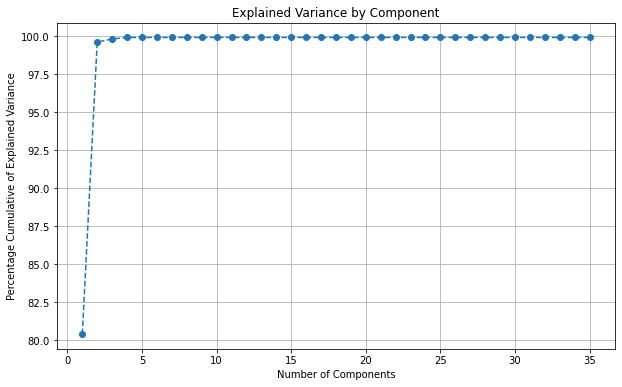

In [7]:
pca = PCA()
pca.fit(normal_values)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

In [10]:
pca = PCA(n_components = 7)
pca.fit(normal_values)

PCA(n_components=7)

In [11]:
scores_pca = pca.transform(normal_values)

In [12]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

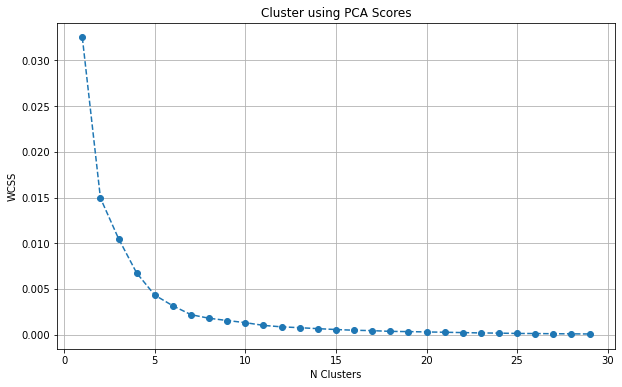

In [13]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [14]:
kmeans_pca = KMeans(n_clusters = 7, init = "k-means++", random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=7, random_state=42)

In [15]:
# Concatening the original df with the components informations present in scores_pca
df_clust_pca_kmeans = pd.concat([df1, pd.DataFrame(scores_pca)], axis = 1)

# Renaming the column label from each component
df_clust_pca_kmeans.columns.values[-5:] = ["comp1", "comp2", "comp3", "comp4", "comp5"]

# Seting the cluster label to each observation, using the atribute .labels_ 
df_clust_pca_kmeans["segment_kmeans_pca"] = kmeans_pca.labels_

# Mapping each cluster segmentation and renaming their labels 
df_clust_pca_kmeans["segment"] = df_clust_pca_kmeans["segment_kmeans_pca"].map({0:"Cluster 1", 1:"Cluster 2", 2:"Cluster 3", 3:"Cluster 4", 4:"Cluster 5"})

In [16]:
df2 = df_clust_pca_kmeans.iloc[ :, 16:21]

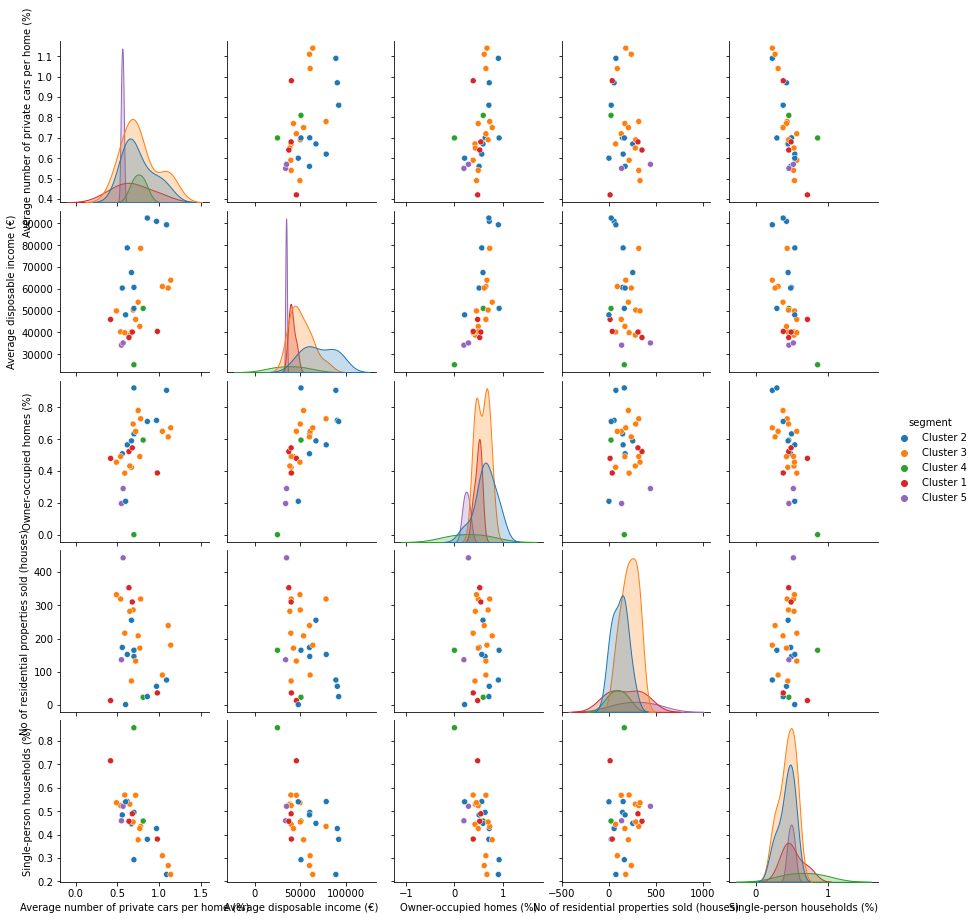

In [17]:
df2['segment'] = df_clust_pca_kmeans['segment']
sns.pairplot(df2[0:], hue='segment')

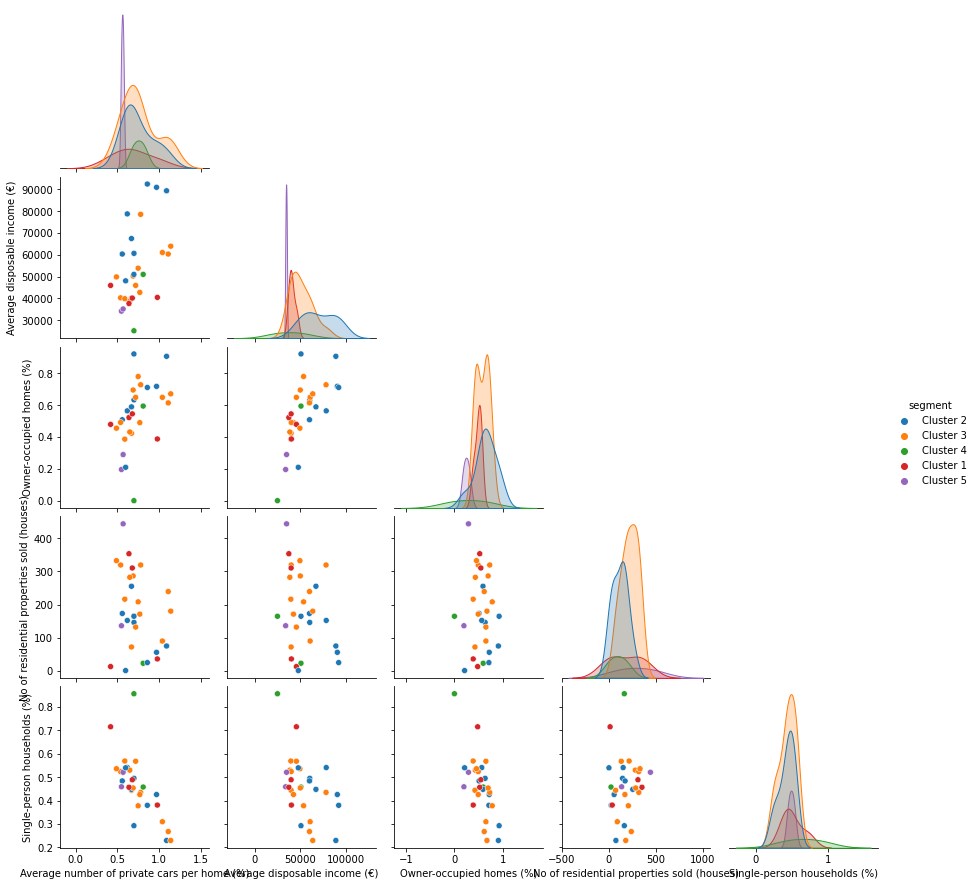

In [18]:
df2['segment'] = df_clust_pca_kmeans['segment']
sns.pairplot(df2[0:], hue='segment', corner = True)